In [1]:
import torch

In [2]:
print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 2060


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


### LeNet-5
LeNet-5 is a convolutional neural network (CNN) architecture developed for handwritten digit recognition tasks such as those in the MNIST dataset.

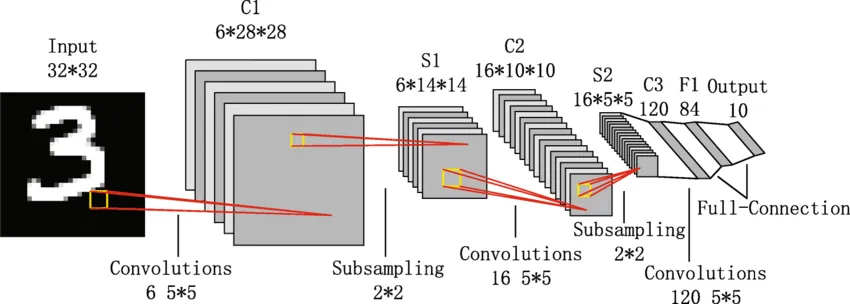

In [8]:
from torch import nn

In [9]:
class LeNet5V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature = nn.Sequential(
            #1
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 14*14
            
            #2
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),  # 10*10
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 5*5
            
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16*5*5, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
            nn.Softmax(dim=1)
        )
        
    def forward(self, x):
        return self.classifier(self.feature(x))

In [10]:
model = LeNet5V1()

In [11]:
model.to(device);

In [12]:
from torchsummary import summary
summary(model, (1, 32, 32))
# Instantiate the LeNet5V1 model
model = LeNet5V1()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
              Tanh-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             Tanh-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
          Softmax-13                   [-1, 10]               0
Total params: 61,706
Trainable params: 

In [13]:
batch_size = 1
channels = 1
height = 32
width = 32
random_input = torch.rand(batch_size, channels, height, width)

In [14]:
with torch.no_grad():
    output = model(random_input)

In [15]:
print("Output Tensor:")
print(output)

Output Tensor:
tensor([[0.1082, 0.0893, 0.1047, 0.1060, 0.1035, 0.0917, 0.1082, 0.0984, 0.0845,
         0.1056]])
